# **Proyecto 2: Registro del núcleo básico de las víctimas de minas antipersonal** 
## **Parte 1:** ***Análisis y visualización de datos con Python***

---
![víctimas de minas antipersonal(MAP)](https://scontent.fbog17-1.fna.fbcdn.net/v/t39.30808-6/339606838_552778496996524_3523491359680729880_n.jpg?_nc_cat=109&ccb=1-7&_nc_sid=783fdb&_nc_eui2=AeEEw6Zsy16gYpUUqv6FAnvYf90YZ_7t_Y5_3Rhn_u39jszrPGzFNrC3nkOnfgeSYjI&_nc_ohc=VQwwFbDusl0AX961etM&_nc_zt=23&_nc_ht=scontent.fbog17-1.fna&oh=00_AfARv3PG5-TkfBsZ7eqqZntQ92V3HQ6KYydN_mwMK_mzow&oe=659C9531)| 
---

# ***1 - Entendimiento del proyecto***


---

### **1.1 - Objetivos del proyecto.**

La situación de las minas antipersonal en Colombia ha representado una problemática humanitaria y de seguridad durante décadas, dejando un legado de víctimas y áreas afectadas en diversas regiones del país. Estos artefactos explosivos improvisados han tenido un impacto devastador en las comunidades locales, causando muertes, lesiones graves y desplazamientos forzados. El Registro del Núcleo Básico de las Víctimas de Minas Antipersonal (MAP) se ha establecido como una herramienta fundamental para recopilar información precisa y detallada sobre las víctimas y proporcionar asistencia integral, rehabilitación y atención psicosocial. El análisis de datos relacionado con este registro es crucial para entender la magnitud del problema, identificar patrones geográficos y demográficos, evaluar las necesidades específicas de las víctimas y diseñar estrategias efectivas de prevención, desminado y atención. A través de técnicas de análisis de datos, se busca generar información resumida que permitan a las autoridades y organizaciones pertinentes tomar decisiones informadas, asignar recursos de manera eficiente y trabajar hacia la erradicación completa de las minas antipersonal en Colombia, garantizando así un futuro más seguro y libre de riesgos para todas las comunidades afectadas.

### **1.2 - Objetivo del proyecto.**

El objetivo principal es obtener la mayor cantidad de información de utilidad que no es visible a simple vista en la base de datos proporcionada, por lo que se abordara el cumplimiento del objetivo mediante las siguientes metas parciales:
-	Limpieza y organización de las columnas de forma correcta validando  entradas lógicas de datos.
-	Presentación del informe del total de víctimas por año,  mes (Independiente del año), departamento, actividad, género y estado.


# ***2 - Entendimiento de los datos***

---
En la etapa de entendimiento de los datos utilizaremos *Python* en análisis avanzado con estadística inferencial y modelado estadístico junto con las librerias *Matplotlib* y *Seaborn* en la construcción de visualizaciones de información. Utilizaremos el *dataset* de [Registro del núcleo básico de las víctimas de minas antipersonal
(MAP)](https://storage.googleapis.com/media-help-ots-geomarketing-odoo/Situaci_n_V_ctimas_Minas_Antipersonal_en_Colombia_20240103.csv) dicho conjunto de datos se encuentra de manera pública en el portal.*

El conjunto de datos cuenta con las siguientes variables:

- departamento
- codigodanedepartamento
- municipio
- codigodanemunicipio 
- tipoarea 
- sitio 
- anio	
- mes 
- rangoedad 
- grupoetnico 
- condicion 
- estado 
- genero 
- latitudcabecera 
- longitudcabecera 
- tipoevento 
- Ubicación
- Actividad 



In [8]:
!pip install -U plotly
!pip install -U kaleido

In [9]:
import plotly
print(f'Plotly: {plotly.__version__}')

Plotly: 5.18.0


In [10]:
#Importar librerías 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from datetime import datetime
from scipy import stats
import statsmodels.api as sm
import unicodedata
import re
import calendar

%matplotlib inline

In [11]:
!python --version
print(f'pandas { pd.__version__}')
print(f'NumPy { np.__version__}')
print(f'Matplotlib { mpl.__version__}')
print(f'seaborn { sns.__version__}')

Python 3.10.5pandas 2.1.4
NumPy 1.26.3

Matplotlib 3.8.2
seaborn 0.13.1


Este proyecto fue realizado con las siguientes versiones:
* Python 3.10.5
* pandas 2.1.4
* NumPy 1.26.3
* Matplotlib 3.8.2
* seaborn 0.13.1
* Plotly: 5.18.0

### **2.1 - Adquisición e integración de datos.**

Para este paso importaremos el archivo de datos aprovechando la utilidad de carga de conjuntos de datos comunes de Seaborn.

In [12]:
#Creamos los datos
url = 'https://storage.googleapis.com/media-help-ots-geomarketing-odoo/Situaci_n_V_ctimas_Minas_Antipersonal_en_Colombia_20240103.csv'
registro_map = pd.read_csv(url)
registro_map.head()

,departamento,codigodanedepartamento,municipio,codigodanemunicipio,tipoarea,sitio,ano,mes,rangoedad,grupoetnico,condicion,estado,genero,latitudcabecera,longitudcabecera,tipoevento,Ubicación,Actividad
0,ANTIOQUIA,5,GRANADA,"5,313",Rural,Sin información,"2,006",1,Mayor de 18 años,No,Civil,Hombre,Herido,6.143703,-75.185183,Sin informacion,"(6.143703, -75.185183)","Pasando, estando cerca"
1,CAQUETA,18,MONTAÑITA,"18,410",Rural,Sin información,"2,009",12,Mayor de 18 años,No,Civil,Hombre,Herido,1.494944,-75.463090,Sin informacion,"(1.49494421255, -75.4630895064)",Erradicador manual - PCI
2,PUTUMAYO,86,PUERTO ASÍS,"86,568",Rural,Sin información,"2,008",4,Mayor de 18 años,No,Civil,Hombre,Muerto,0.502569,-76.498180,Sin informacion,"(0.502569, -76.49818)",Erradicador manual - PCI
3,CORDOBA,23,PUERTO LIBERTADOR,"23,580",Rural,Sin información,"2,009",11,Mayor de 18 años,No,Civil,Hombre,Herido,7.883545,-75.670508,Sin informacion,"(7.883545, -75.670508)",Erradicador manual - PCI
4,CORDOBA,23,PUERTO LIBERTADOR,"23,580",Rural,Sin información,"2,009",11,Mayor de 18 años,No,Civil,Hombre,Herido,7.883545,-75.670508,Sin informacion,"(7.883545, -75.670508)",Erradicador manual - PCI


### **2.2 - Análisis exploratorio de datos.**

En las siguientes celdas se explora los diferentes tipos de variables (columnas) del conjunto de datos utilizando *pandas*. 

In [13]:
registro_map.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12364 entries, 0 to 12363
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   departamento            12364 non-null  object 
 1   codigodanedepartamento  12364 non-null  int64  
 2   municipio               12364 non-null  object 
 3   codigodanemunicipio     12364 non-null  object 
 4   tipoarea                12364 non-null  object 
 5   sitio                   12364 non-null  object 
 6   ano                     12364 non-null  object 
 7   mes                     12364 non-null  int64  
 8   rangoedad               12364 non-null  object 
 9   grupoetnico             12364 non-null  object 
 10  condicion               12364 non-null  object 
 11  estado                  12364 non-null  object 
 12  genero                  12364 non-null  object 
 13  latitudcabecera         12364 non-null  float64
 14  longitudcabecera        12364 non-null

A continuacion se identifican, que variables tienen **filas con valores faltantes**:

In [14]:
valores_faltantes = registro_map.columns[registro_map.isnull().any()]
valores_faltantes

Index([], dtype='object')

### **2.3 - Descripciones generales.**

Para una exploracion inicial, se imprime en pantalla los primeros y  ultimos diez registros de datos junto con una muestra aleatoria, utilizando las funciones head(), tail() y .sample():

In [15]:
registro_map.head(10)

,departamento,codigodanedepartamento,municipio,codigodanemunicipio,tipoarea,sitio,ano,mes,rangoedad,grupoetnico,condicion,estado,genero,latitudcabecera,longitudcabecera,tipoevento,Ubicación,Actividad
0,ANTIOQUIA,5,GRANADA,"5,313",Rural,Sin información,"2,006",1,Mayor de 18 años,No,Civil,Hombre,Herido,6.143703,-75.185183,Sin informacion,"(6.143703, -75.185183)","Pasando, estando cerca"
1,CAQUETA,18,MONTAÑITA,"18,410",Rural,Sin información,"2,009",12,Mayor de 18 años,No,Civil,Hombre,Herido,1.494944,-75.463090,Sin informacion,"(1.49494421255, -75.4630895064)",Erradicador manual - PCI
2,PUTUMAYO,86,PUERTO ASÍS,"86,568",Rural,Sin información,"2,008",4,Mayor de 18 años,No,Civil,Hombre,Muerto,0.502569,-76.498180,Sin informacion,"(0.502569, -76.49818)",Erradicador manual - PCI
3,CORDOBA,23,PUERTO LIBERTADOR,"23,580",Rural,Sin información,"2,009",11,Mayor de 18 años,No,Civil,Hombre,Herido,7.883545,-75.670508,Sin informacion,"(7.883545, -75.670508)",Erradicador manual - PCI
4,CORDOBA,23,PUERTO LIBERTADOR,"23,580",Rural,Sin información,"2,009",11,Mayor de 18 años,No,Civil,Hombre,Herido,7.883545,-75.670508,Sin informacion,"(7.883545, -75.670508)",Erradicador manual - PCI
5,CORDOBA,23,PUERTO LIBERTADOR,"23,580",Rural,Sin información,"2,009",11,Mayor de 18 años,No,Civil,Hombre,Herido,7.883545,-75.670508,Sin informacion,"(7.883545, -75.670508)",Erradicador manual - PCI
6,CORDOBA,23,PUERTO LIBERTADOR,"23,580",Rural,Sin información,"2,009",11,Mayor de 18 años,No,Civil,Hombre,Herido,7.883545,-75.670508,Sin informacion,"(7.883545, -75.670508)",Erradicador manual - PCI
7,NARIÑO,52,BARBACOAS,"52,079",Rural,Vereda Santa Lucia,"2,010",1,Mayor de 18 años,No,Fuerza pública,Hombre,Herido,1.587500,-78.227500,Sin informacion,"(1.5875, -78.2275)",Fuerza pública
8,ANTIOQUIA,5,TARAZÁ,"5,790",Rural,Quebrada Iraca,"2,010",1,Mayor de 18 años,No,Fuerza pública,Hombre,Herido,7.372778,-75.204444,Sin informacion,"(7.372777777777777, -75.20444444444445)",Fuerza pública
9,ANTIOQUIA,5,VALDIVIA,"5,854",Rural,Sin información,"2,008",3,Mayor de 18 años,No,Civil,Hombre,Herido,7.165222,-75.438081,Sin informacion,"(7.165222, -75.438081)",Erradicador manual - PCI


In [16]:
registro_map.tail(10)

,departamento,codigodanedepartamento,municipio,codigodanemunicipio,tipoarea,sitio,ano,mes,rangoedad,grupoetnico,condicion,estado,genero,latitudcabecera,longitudcabecera,tipoevento,Ubicación,Actividad
12354,NARIÑO,52,OLAYA HERRERA,"52,490",Rural,VEREDA SAN JOSE LOS ROBLES,"2,023",6,Menor de 18 años,No,Civil,Mujer,Herido,2.314415,-78.334345,Campo,"(2.31441546587, -78.3343454855)",Agricultura
12355,NORTE DE SANTANDER,54,EL TARRA,"54,250",Rural,Vereda El Porvenir,"2,023",6,Mayor de 18 años,No,Fuerza pública,Hombre,Herido,8.658333,-73.146944,Sin informacion,"(8.65833333333333, -73.1469444444444)",Actividades fuerza pública
12356,NARIÑO,52,IPIALES,"52,356",Rural,VEREDA EL ASUAY,"2,023",6,Mayor de 18 años,No,Civil,Hombre,Herido,0.829810,-77.629760,Campo,"(0.82981043391, -77.6297604828)",Agricultura
12357,NARIÑO,52,RICAURTE,"52,612",Rural,RESGUARDO DE VEGAS CHAGÜI - CHIMBUZA,"2,023",6,Mayor de 18 años,Indigena,Civil,Mujer,Herido,1.190763,-78.117007,Caminos,"(1.19076305555556, -78.1170069444444)",Sin Información
12358,NARIÑO,52,RICAURTE,"52,612",Rural,RESGUARDO DE VEGAS CHAGÜI - CHIMBUZA,"2,023",6,Mayor de 18 años,Indigena,Civil,Hombre,Herido,1.190763,-78.117007,Caminos,"(1.19076305555556, -78.1170069444444)",Sin Información
12359,NARIÑO,52,RICAURTE,"52,612",Rural,RESGUARDO DE VEGAS CHAGÜI - CHIMBUZA,"2,023",6,Mayor de 18 años,Indigena,Civil,Mujer,Herido,1.190763,-78.117007,Caminos,"(1.19076305555556, -78.1170069444444)",Sin Información
12360,NARIÑO,52,RICAURTE,"52,612",Rural,RESGUARDO DE VEGAS CHAGÜI - CHIMBUZA,"2,023",6,Mayor de 18 años,Indigena,Civil,Mujer,Herido,1.190763,-78.117007,Caminos,"(1.19076305555556, -78.1170069444444)",Sin Información
12361,NARIÑO,52,RICAURTE,"52,612",Rural,RESGUARDO DE VEGAS CHAGÜI - CHIMBUZA,"2,023",6,Mayor de 18 años,Indigena,Civil,Hombre,Herido,1.190763,-78.117007,Caminos,"(1.19076305555556, -78.1170069444444)",Sin Información
12362,NARIÑO,52,RICAURTE,"52,612",Rural,RESGUARDO DE VEGAS CHAGÜI - CHIMBUZA,"2,023",6,Mayor de 18 años,Indigena,Civil,Hombre,Herido,1.190763,-78.117007,Caminos,"(1.19076305555556, -78.1170069444444)",Sin Información
12363,NARIÑO,52,RICAURTE,"52,612",Rural,RESGUARDO DE VEGAS CHAGÜI - CHIMBUZA,"2,023",6,Mayor de 18 años,Indigena,Civil,Hombre,Muerto,1.190763,-78.117007,Caminos,"(1.19076305555556, -78.1170069444444)",Sin Información


In [17]:
registro_map.sample(10)

,departamento,codigodanedepartamento,municipio,codigodanemunicipio,tipoarea,sitio,ano,mes,rangoedad,grupoetnico,condicion,estado,genero,latitudcabecera,longitudcabecera,tipoevento,Ubicación,Actividad
3377,ANTIOQUIA,5,ITUANGO,"5,361",Rural,Vereda El Olivar,"2,005",9,Mayor de 18 años,No,Fuerza pública,Hombre,Herido,7.231944,-75.864167,Sin informacion,"(7.231944, -75.864167)",Fuerza pública
2422,TOLIMA,73,RIOBLANCO,"73,616",Rural,"Vereda La Catalina, Finca Los Guayabos","2,007",1,Menor de 18 años,No,Civil,Hombre,Muerto,3.529701,-75.644823,Sin informacion,"(3.529701, -75.644823)","Pasando, estando cerca"
1535,ARAUCA,81,ARAUQUITA,"81,065",Rural,Sur Filipinas,"2,009",1,Mayor de 18 años,No,Fuerza pública,Hombre,Herido,6.646667,-71.216944,Sin informacion,"(6.6466666666666665, -71.21694444444445)",Fuerza pública
7514,ANTIOQUIA,5,ZARAGOZA,"5,895",Rural,Sin información,"2,001",4,Menor de 18 años,No,Civil,Mujer,Herido,7.490632,-74.867778,Sin informacion,"(7.490632, -74.867778)","Pasando, estando cerca"
12156,CAUCA,19,EL TAMBO,"19,256",Rural,CORREGIMIENTO HUISITÓ,"2,022",2,Mayor de 18 años,No,Civil,Hombre,Herido,2.450573,-76.805205,Sin informacion,"(2.45057270515, -76.8052045915)",Sin Información
8953,PUTUMAYO,86,PUERTO ASÍS,"86,568",Rural,Sin información,"2,011",8,Mayor de 18 años,No,Fuerza pública,Hombre,Muerto,0.285278,-76.540833,Sin informacion,"(0.2852777778, -76.5408333333)",Fuerza pública
8116,NORTE DE SANTANDER,54,TEORAMA,"54,800",Rural,Sin información,"2,007",9,Mayor de 18 años,No,Fuerza pública,Hombre,Herido,8.441389,-73.268611,Sin informacion,"(8.441389, -73.268611)",Fuerza pública
7163,META,50,VISTAHERMOSA,"50,711",Rural,Vereda La Reforma Sur,"2,008",5,Mayor de 18 años,No,Fuerza pública,Hombre,Herido,3.125088,-73.752373,Sin informacion,"(3.125088, -73.752373)",Fuerza pública
10888,CAUCA,19,EL TAMBO,"19,256",Rural,Huisito Santa Rita,"2,010",6,Mayor de 18 años,No,Fuerza pública,Hombre,Herido,2.604722,-77.012500,Sin informacion,"(2.60472222222222, -77.0125)",Fuerza pública
11586,NORTE DE SANTANDER,54,SAN CALIXTO,"54,670",Rural,VEREDA LA LAGUNA,"2,018",8,Menor de 18 años,No,Civil,Hombre,Herido,8.404078,-73.208168,Caminos,"(8.40407771429, -73.208167626)","Recogiendo comida, agua ó madera"


Debido a que la base de información con la que se esta trabajando tiene en su mayoria variables categóricas, se quiere encontrar la información acerca de las categorias que cada una de ellas puede tener para posteriormente ser limpiada en el caso de que tengan caracteres especiales como tildes, acentos, ñ, entre otros. Para ello utilizaremos para identificar un arreglo con estas categoría (unique) y posteriormente bibliotecas como unicodedata y expresiones regulares (regex).

In [18]:
registro_map['departamento'].unique()

array(['ANTIOQUIA', 'CAQUETA', 'PUTUMAYO', 'CORDOBA', 'NARIÑO', 'CAUCA',
       'GUAVIARE', 'META', 'NORTE DE SANTANDER', 'BOLIVAR', 'HUILA',
       'VALLE DEL CAUCA', 'VAUPES', 'ARAUCA', 'TOLIMA', 'CASANARE',
       'VICHADA', 'CHOCO', 'SANTANDER', 'CESAR', 'LA GUAJIRA',
       'CUNDINAMARCA', 'CALDAS', 'BOGOTA DC', 'MAGDALENA', 'SUCRE',
       'QUINDIO', 'BOYACA', 'GUAINIA', 'RISARALDA', 'ATLANTICO',
       'AMAZONAS'], dtype=object)

In [19]:
registro_map['codigodanedepartamento'].unique()

array([ 5, 18, 86, 23, 52, 19, 95, 50, 54, 13, 41, 76, 97, 81, 73, 85, 99,
       27, 68, 20, 44, 25, 17, 11, 47, 70, 63, 15, 94, 66,  8, 91],
      dtype=int64)

In [291]:
registro_map['municipio'].unique()

array(['GRANADA', 'MONTAÑITA', 'PUERTO ASÍS', 'PUERTO LIBERTADOR',
       'BARBACOAS', 'TARAZÁ', 'VALDIVIA', 'TORIBÍO', 'SANTA CRUZ',
       'RICAURTE', 'EL RETORNO', 'SAN JUAN DE ARAMA', 'TIBÚ', 'SAN PABLO',
       'SAN MIGUEL', 'SUÁREZ', 'EL CARMEN DE BOLÍVAR', 'MAPIRIPÁN',
       'ALGECIRAS', 'ITUANGO', 'FLORIDA', 'BARAYA', 'TIERRALTA',
       'TALAIGUA NUEVO', 'CARURÚ', 'TEORAMA', 'HACARÍ', 'CÁCERES',
       'PUERTO RONDÓN', 'SAMANIEGO', 'TAME', 'MIRAFLORES', 'RIOBLANCO',
       'CIÉNAGA DE ORO', 'CALAMAR', 'SAN CARLOS', 'APARTADÓ', 'LA PLAYA',
       'VALLE DEL GUAMUEZ', 'SOLANO', 'SAN CALIXTO', 'SAN ANDRÉS',
       'AGUAZUL', 'ISNOS', 'ARAUQUITA', 'PUERTO RICO', 'FLORENCIA',
       'MEDELLÍN', 'COLOMBIA', 'EL TARRA', 'BALBOA', 'SANTA ROSA DEL SUR',
       'URIBE', 'SAN LUIS', 'SAN JOSÉ DEL FRAGUA', 'PRADERA', 'PALERMO',
       'ANORÍ', 'SAN JOSÉ DEL GUAVIARE', 'VISTAHERMOSA', 'ÁBREGO',
       'CORINTO', 'URRAO', 'TULUÁ', 'MESETAS', 'EL TAMBO', 'CUMARIBO',
       'CALOTO', 'SAN AG

In [21]:
registro_map['codigodanemunicipio'].unique()

array(['5,313', '18,410', '86,568', '23,580', '52,079', '5,790', '5,854',
       '19,821', '52,699', '52,612', '95,025', '50,683', '54,810',
       '13,670', '86,757', '19,780', '13,244', '50,325', '41,020',
       '5,361', '76,275', '41,078', '23,807', '13,780', '97,161',
       '54,800', '54,344', '5,120', '81,591', '52,678', '81,794',
       '95,200', '73,616', '23,189', '95,015', '5,649', '5,045', '54,398',
       '86,865', '18,756', '54,670', '5,647', '85,010', '41,359',
       '81,065', '18,592', '18,001', '5,001', '41,206', '54,250',
       '50,590', '19,075', '13,688', '50,370', '5,660', '18,610',
       '76,563', '41,524', '5,040', '95,001', '50,711', '54,003',
       '19,212', '5,847', '76,834', '50,330', '19,256', '99,773',
       '19,142', '41,668', '5,107', '27,150', '76,113', '13,160',
       '54,206', '5,873', '5,490', '68,655', '85,250', '5,234', '52,573',
       '41,001', '5,315', '76,670', '73,555', '86,569', '86,573',
       '18,753', '19,418', '50,400', '73,449', '2

In [22]:
registro_map['tipoarea'].unique()

array(['Rural', 'Urbana'], dtype=object)

In [23]:
registro_map['sitio'].unique()

array(['Sin información', 'Vereda Santa Lucia', 'Quebrada Iraca', ...,
       'VEREDA SAN JOSE LOS ROBLES', 'VEREDA EL ASUAY',
       'RESGUARDO DE VEGAS CHAGÜI - CHIMBUZA'], dtype=object)

In [24]:
registro_map['ano'].unique()

array(['2,006', '2,009', '2,008', '2,010', '1,993', '2,000', '2,003',
       '2,004', '2,007', '2,005', '2,001', '2,011', '1,996', '2,002',
       '1,999', '1,998', '1,994', '1,992', '1,997', '1,991', '1,995',
       '1,990', '2,015', '2,013', '2,012', '2,014', '2,016', '2,017',
       '2,018', '2,019', '2,020', '2,021', '2,022', '1,984', '2,023'],
      dtype=object)

In [25]:
registro_map['mes'].unique()

array([ 1, 12,  4, 11,  3,  8,  7, 10,  9,  2,  5,  6], dtype=int64)

In [26]:
registro_map['rangoedad'].unique()

array(['Mayor de 18 años', 'Menor de 18 años'], dtype=object)

In [27]:
registro_map['grupoetnico'].unique()

array(['No', 'Indigena', 'Afrodescendiente'], dtype=object)

In [28]:
registro_map['condicion'].unique()

array(['Civil', 'Fuerza pública'], dtype=object)

In [29]:
registro_map['estado'].unique()

array(['Hombre', 'Mujer', 'Sin Información'], dtype=object)

In [30]:
registro_map['genero'].unique()

array(['Herido', 'Muerto'], dtype=object)

In [31]:
registro_map['latitudcabecera'].unique()

array([6.143703  , 1.49494421, 0.502569  , ..., 8.65833333, 0.82981043,
       1.19076306])

In [32]:
registro_map['longitudcabecera'].unique()

array([-75.185183  , -75.46308951, -76.49818   , ..., -73.14694444,
       -77.62976048, -78.11700694])

In [33]:
registro_map['tipoevento'].unique()

array(['Sin informacion', 'En cerca a edificio residencial', 'Caminos',
       'Cerros', 'en sobre cerca rivera de un rio', 'Canos', 'Quebradas',
       'Sendero', 'Viviendas abandonadas', 'Campo', 'Fincas', 'Puentes',
       'Campamentos ilegales', 'Infraestructura de comunicaciones',
       'Carretera', 'Oleoductos', 'En cerca instalacion militar',
       'Borde de la carretera', 'Escuelas', 'Infra torres electricas',
       'Centro de salud', 'Infra gaseoducto',
       'Centros deportivos recreacion', 'En cerca edificio gubernamental'],
      dtype=object)

In [34]:
registro_map['Ubicación'].unique()

array(['(6.143703, -75.185183)', '(1.49494421255, -75.4630895064)',
       '(0.502569, -76.49818)', ...,
       '(8.65833333333333, -73.1469444444444)',
       '(0.82981043391, -77.6297604828)',
       '(1.19076305555556, -78.1170069444444)'], dtype=object)

In [35]:
registro_map['Actividad'].unique()

array(['Pasando, estando cerca', 'Erradicador manual - PCI',
       'Fuerza pública', 'Sin Información', 'Transito por via usual',
       'Cuidado de animales', 'Trabajos de casa',
       'Transito por trocha atajo', 'Otra', 'Agricultura',
       'Recogiendo comida, agua ó  madera',
       'Erradicacion de cultivos ilicitos', 'Jugando', 'Caza, pesca',
       'Viajando', 'Manipulación', 'Labores de desminado',
       'Mantenimiento de infraestructura', 'Actividades fuerza pública',
       'Labores de rescate', 'Erradicación - PONAL'], dtype=object)

## **3- Limpieza de la información.**

Realizamos una funcion que nos permita realizar la limpieza de los valores unicos de cada variable, las cuales se guardaran en un nuevo dataset el cual denominaremos como registro_map_limpia.

In [36]:
def limpiar_texto(texto):
    # Normalizar texto eliminando diacríticos (tildes, acentos)
    texto_normalizado = unicodedata.normalize('NFKD', texto).encode('ASCII', 'ignore').decode('ASCII')
    
    # Utilizar expresiones regulares para eliminar caracteres específicos
    texto_limpio = re.sub(r'[^\w\s]', '', texto_normalizado)
    
    return texto_limpio

In [37]:
def limpiar_tabla(tabla):
    """Función para limpiar cada valor de cada columna en una tabla."""
    tabla_limpia = {}
    
    for columna, valores in tabla.items():
        valores_limpio = [limpiar_texto(str(valor)) for valor in valores]
        tabla_limpia[columna] = valores_limpio
    
    # Convertir el diccionario a un DataFrame de pandas
    df = pd.DataFrame(tabla_limpia)

    return df

In [38]:
registro_map_limpia = limpiar_tabla(registro_map)

In [39]:
registro_map_limpia.head()

,departamento,codigodanedepartamento,municipio,codigodanemunicipio,tipoarea,sitio,ano,mes,rangoedad,grupoetnico,condicion,estado,genero,latitudcabecera,longitudcabecera,tipoevento,Ubicación,Actividad
0,ANTIOQUIA,5,GRANADA,5313,Rural,Sin informacion,2006,1,Mayor de 18 anos,No,Civil,Hombre,Herido,6143703,75185183,Sin informacion,6143703 75185183,Pasando estando cerca
1,CAQUETA,18,MONTANITA,18410,Rural,Sin informacion,2009,12,Mayor de 18 anos,No,Civil,Hombre,Herido,149494421255,754630895064,Sin informacion,149494421255 754630895064,Erradicador manual PCI
2,PUTUMAYO,86,PUERTO ASIS,86568,Rural,Sin informacion,2008,4,Mayor de 18 anos,No,Civil,Hombre,Muerto,0502569,7649818,Sin informacion,0502569 7649818,Erradicador manual PCI
3,CORDOBA,23,PUERTO LIBERTADOR,23580,Rural,Sin informacion,2009,11,Mayor de 18 anos,No,Civil,Hombre,Herido,7883545,75670508,Sin informacion,7883545 75670508,Erradicador manual PCI
4,CORDOBA,23,PUERTO LIBERTADOR,23580,Rural,Sin informacion,2009,11,Mayor de 18 anos,No,Civil,Hombre,Herido,7883545,75670508,Sin informacion,7883545 75670508,Erradicador manual PCI


A continuación, realizaremos verificación de la limpieza de la información: 

In [40]:
registro_map_limpia['departamento'].unique()

array(['ANTIOQUIA', 'CAQUETA', 'PUTUMAYO', 'CORDOBA', 'NARINO', 'CAUCA',
       'GUAVIARE', 'META', 'NORTE DE SANTANDER', 'BOLIVAR', 'HUILA',
       'VALLE DEL CAUCA', 'VAUPES', 'ARAUCA', 'TOLIMA', 'CASANARE',
       'VICHADA', 'CHOCO', 'SANTANDER', 'CESAR', 'LA GUAJIRA',
       'CUNDINAMARCA', 'CALDAS', 'BOGOTA DC', 'MAGDALENA', 'SUCRE',
       'QUINDIO', 'BOYACA', 'GUAINIA', 'RISARALDA', 'ATLANTICO',
       'AMAZONAS'], dtype=object)

In [41]:
registro_map_limpia['municipio'].unique()

array(['GRANADA', 'MONTANITA', 'PUERTO ASIS', 'PUERTO LIBERTADOR',
       'BARBACOAS', 'TARAZA', 'VALDIVIA', 'TORIBIO', 'SANTA CRUZ',
       'RICAURTE', 'EL RETORNO', 'SAN JUAN DE ARAMA', 'TIBU', 'SAN PABLO',
       'SAN MIGUEL', 'SUAREZ', 'EL CARMEN DE BOLIVAR', 'MAPIRIPAN',
       'ALGECIRAS', 'ITUANGO', 'FLORIDA', 'BARAYA', 'TIERRALTA',
       'TALAIGUA NUEVO', 'CARURU', 'TEORAMA', 'HACARI', 'CACERES',
       'PUERTO RONDON', 'SAMANIEGO', 'TAME', 'MIRAFLORES', 'RIOBLANCO',
       'CIENAGA DE ORO', 'CALAMAR', 'SAN CARLOS', 'APARTADO', 'LA PLAYA',
       'VALLE DEL GUAMUEZ', 'SOLANO', 'SAN CALIXTO', 'SAN ANDRES',
       'AGUAZUL', 'ISNOS', 'ARAUQUITA', 'PUERTO RICO', 'FLORENCIA',
       'MEDELLIN', 'COLOMBIA', 'EL TARRA', 'BALBOA', 'SANTA ROSA DEL SUR',
       'URIBE', 'SAN LUIS', 'SAN JOSE DEL FRAGUA', 'PRADERA', 'PALERMO',
       'ANORI', 'SAN JOSE DEL GUAVIARE', 'VISTAHERMOSA', 'ABREGO',
       'CORINTO', 'URRAO', 'TULUA', 'MESETAS', 'EL TAMBO', 'CUMARIBO',
       'CALOTO', 'SAN AG

In [42]:
registro_map_limpia['sitio'].unique()

array(['Sin informacion', 'Vereda Santa Lucia', 'Quebrada Iraca', ...,
       'VEREDA SAN JOSE LOS ROBLES', 'VEREDA EL ASUAY',
       'RESGUARDO DE VEGAS CHAGUI  CHIMBUZA'], dtype=object)

In [73]:
registro_map_limpia['mes'].unique()

array([ 1, 12,  4, 11,  3,  8,  7, 10,  9,  2,  5,  6], dtype=int64)

In [43]:
registro_map_limpia['rangoedad'].unique()

array(['Mayor de 18 anos', 'Menor de 18 anos'], dtype=object)

In [44]:
registro_map_limpia['condicion'].unique()

array(['Civil', 'Fuerza publica'], dtype=object)

In [45]:
registro_map_limpia['estado'].unique()

array(['Hombre', 'Mujer', 'Sin Informacion'], dtype=object)

In [46]:
registro_map_limpia['genero'].unique()

array(['Herido', 'Muerto'], dtype=object)

In [47]:
registro_map_limpia['tipoevento'].unique()

array(['Sin informacion', 'En cerca a edificio residencial', 'Caminos',
       'Cerros', 'en sobre cerca rivera de un rio', 'Canos', 'Quebradas',
       'Sendero', 'Viviendas abandonadas', 'Campo', 'Fincas', 'Puentes',
       'Campamentos ilegales', 'Infraestructura de comunicaciones',
       'Carretera', 'Oleoductos', 'En cerca instalacion militar',
       'Borde de la carretera', 'Escuelas', 'Infra torres electricas',
       'Centro de salud', 'Infra gaseoducto',
       'Centros deportivos recreacion', 'En cerca edificio gubernamental'],
      dtype=object)

In [48]:
registro_map_limpia['Actividad'].unique()

array(['Pasando estando cerca', 'Erradicador manual  PCI',
       'Fuerza publica', 'Sin Informacion', 'Transito por via usual',
       'Cuidado de animales', 'Trabajos de casa',
       'Transito por trocha atajo', 'Otra', 'Agricultura',
       'Recogiendo comida agua o  madera',
       'Erradicacion de cultivos ilicitos', 'Jugando', 'Caza pesca',
       'Viajando', 'Manipulacion', 'Labores de desminado',
       'Mantenimiento de infraestructura', 'Actividades fuerza publica',
       'Labores de rescate', 'Erradicacion  PONAL'], dtype=object)

En el anterior punto se observo que las columnas "estado" y "genero" se encuentran intercambiadas, se procede hacer la corrección pertinente cambiado el nombre de cada variable. 

In [49]:
registro_map_limpia.rename(columns={'estado': 'genero_'}, inplace=True)
registro_map_limpia.rename(columns={'genero': 'estado'}, inplace=True)
registro_map_limpia.rename(columns={'genero_': 'genero'}, inplace=True)
registro_map_limpia.rename(columns={'ano': 'anio'}, inplace=True)
registro_map_limpia.head()

,departamento,codigodanedepartamento,municipio,codigodanemunicipio,tipoarea,sitio,anio,mes,rangoedad,grupoetnico,condicion,genero,estado,latitudcabecera,longitudcabecera,tipoevento,Ubicación,Actividad
0,ANTIOQUIA,5,GRANADA,5313,Rural,Sin informacion,2006,1,Mayor de 18 anos,No,Civil,Hombre,Herido,6143703,75185183,Sin informacion,6143703 75185183,Pasando estando cerca
1,CAQUETA,18,MONTANITA,18410,Rural,Sin informacion,2009,12,Mayor de 18 anos,No,Civil,Hombre,Herido,149494421255,754630895064,Sin informacion,149494421255 754630895064,Erradicador manual PCI
2,PUTUMAYO,86,PUERTO ASIS,86568,Rural,Sin informacion,2008,4,Mayor de 18 anos,No,Civil,Hombre,Muerto,0502569,7649818,Sin informacion,0502569 7649818,Erradicador manual PCI
3,CORDOBA,23,PUERTO LIBERTADOR,23580,Rural,Sin informacion,2009,11,Mayor de 18 anos,No,Civil,Hombre,Herido,7883545,75670508,Sin informacion,7883545 75670508,Erradicador manual PCI
4,CORDOBA,23,PUERTO LIBERTADOR,23580,Rural,Sin informacion,2009,11,Mayor de 18 anos,No,Civil,Hombre,Herido,7883545,75670508,Sin informacion,7883545 75670508,Erradicador manual PCI


Los datos de la columna año se encuentran como tipo object lo que puede dificultar trabajar poteriormente con estos, por lo cual se pasan como tipo de dato de tiempo.

In [ ]:
registro_map_limpia['anio'] =  pd.to_datetime(registro_map_limpia['anio'])

Debido a que los datos de la columna "mes" pueden existir algunos string, nos aseguramos de que 'mes' sea numérico (si no lo es, se conviérte)

In [149]:
registro_map_limpia['mes'] = pd.to_numeric(registro_map_limpia['mes'], errors='coerce')

## **3- Reporte de resultados.**

Se presenta el resultados de los reportes siguientes sobre las víctimas:

- total víctimas por año
- total víctimas por mes (Independiente del año)
- total víctimas por departamento
- total víctimas por actividad
- total de víctimas por género
- total de víctimas por estado

### **3.1- Total víctimas por año.**

In [61]:
total_victimas_x_anio = pd.DataFrame(registro_map_limpia['anio'])
total_victimas_x_anio['anio'] = pd.to_datetime(total_victimas_x_anio['anio']).dt.year
total_victimas_x_anio = total_victimas_x_anio['anio'].value_counts().sort_index()
total_victimas_x_anio

anio
1984       1
1990      23
1991      70
1992     153
1993      88
1994      86
1995     130
1996     120
1997      96
1998      59
1999      54
2000     141
2001     299
2002     631
2003     760
2004     900
2005    1176
2006    1224
2007     980
2008     851
2009     771
2010     679
2011     564
2012     589
2013     427
2014     293
2015     223
2016      90
2017      59
2018     179
2019     117
2020     176
2021     157
2022     139
2023      59
Name: count, dtype: int64

Text(0.5, 1.0, 'Total de victimas por año')

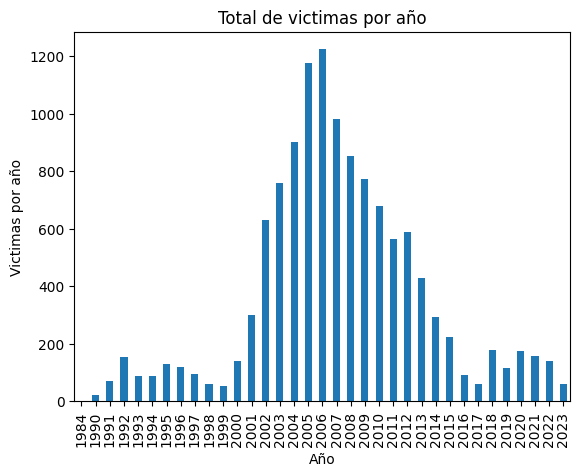

In [56]:
total_victimas_x_anio.plot(kind='bar')
plt.xlabel('Año')
plt.ylabel('Victimas por año')
plt.title('Total de victimas por año')

De acuerdo con el informe y la gráfica de barras, se evidencia un aumento en el número de víctimas por minas antipersona desde el año 1990. Este aumento alcanzó su punto máximo en el año 2006, con un total de 1,224 víctimas registradas. A partir de ese año, se observa una disminución progresiva en el número de víctimas.

### **3.2 - Total víctimas por mes (Independiente del año).**

In [279]:
total_victimas_x_mes = pd.DataFrame(registro_map_limpia['mes'].value_counts()).reset_index()
total_victimas_x_mes.columns = ['mes', 'cant_víctimas']
total_victimas_x_mes['mes'] = total_victimas_x_mes['mes'].astype(int).apply(lambda x: calendar.month_name[x])
meses_ordenados = [calendar.month_name[i] for i in range(1, 13)] 
total_victimas_x_mes['mes'] = pd.Categorical(total_victimas_x_mes['mes'], categories=meses_ordenados, ordered=True)
total_victimas_x_mes = total_victimas_x_mes.sort_values(by='mes')
total_victimas_x_mes

,mes,cant_víctimas
9,January,911
1,February,1255
0,March,1318
2,April,1124
3,May,1120
4,June,1093
7,July,1008
5,August,1054
8,September,930
6,October,1018


Text(0.5, 1.0, 'Total de víctimas de minas antipersonas por mes')

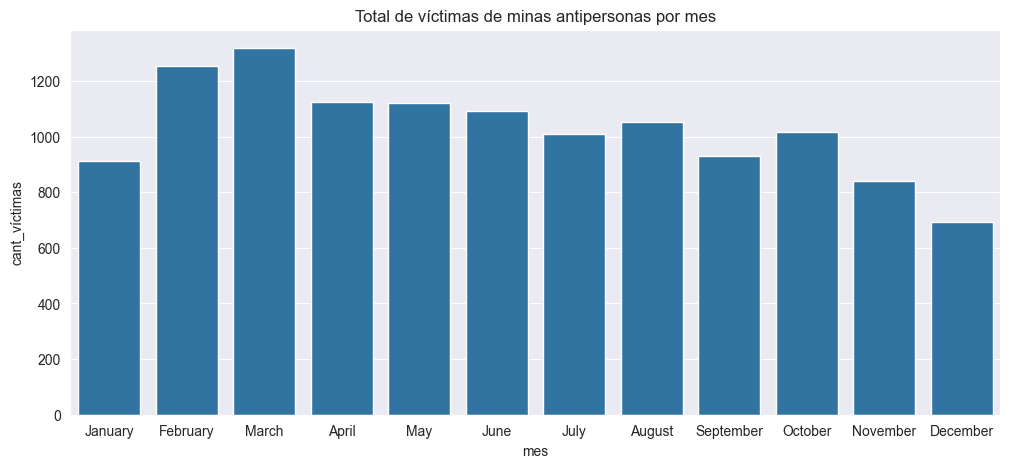

In [286]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,5))
sns.barplot(x='mes', y='cant_víctimas', data = total_victimas_x_mes)
plt.xticks( rotation=0)
plt.title('Total de víctimas de minas antipersonas por mes')

### **3.3 - Total víctimas por departamento.**

In [191]:
total_victimas_x_dept = pd.DataFrame(registro_map_limpia['departamento'])
total_victimas_x_dept = total_victimas_x_dept['departamento'].value_counts()
total_victimas_x_dept

departamento
ANTIOQUIA             2658
META                  1152
NARINO                1115
NORTE DE SANTANDER     970
CAQUETA                946
CAUCA                  662
ARAUCA                 656
BOLIVAR                645
TOLIMA                 539
PUTUMAYO               459
SANTANDER              297
CORDOBA                283
VALLE DEL CAUCA        271
GUAVIARE               267
HUILA                  239
CHOCO                  230
CALDAS                 170
CESAR                  156
CUNDINAMARCA           141
CASANARE                90
SUCRE                   78
BOYACA                  78
LA GUAJIRA              60
MAGDALENA               46
VAUPES                  44
BOGOTA DC               30
QUINDIO                 28
RISARALDA               22
VICHADA                 17
ATLANTICO                8
AMAZONAS                 4
GUAINIA                  3
Name: count, dtype: int64

Text(0.5, 1.0, 'Total de victimas por departamento')

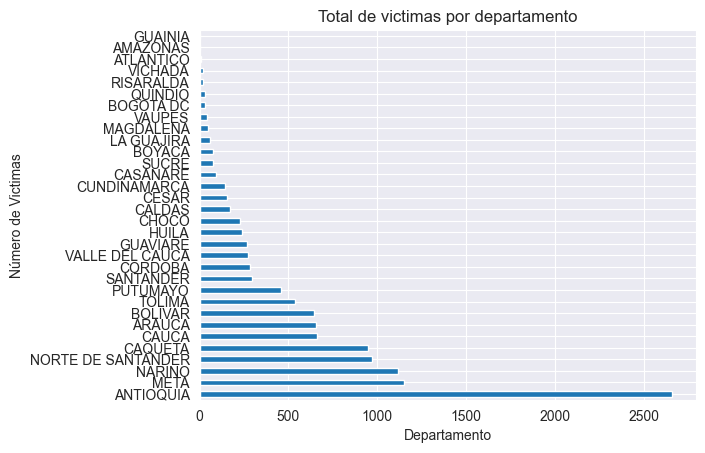

In [284]:
total_victimas_x_dept.plot(kind='barh')
plt.xlabel('Departamento')
plt.ylabel('Número de Victimas')
plt.title('Total de victimas por departamento')

### **3.4 - Total víctimas por actividad.**

In [217]:
total_victimas_x_actividad = pd.DataFrame(registro_map_limpia['Actividad'])
total_victimas_x_actividad = pd.DataFrame(registro_map_limpia['Actividad'].value_counts())
total_victimas_x_actividad

,count
Actividad,
Fuerza publica,6913
Sin Informacion,2108
Pasando estando cerca,1112
Agricultura,366
Erradicador manual PCI,360
Actividades fuerza publica,254
Manipulacion,192
Transito por via usual,187
Recogiendo comida agua o madera,180


Text(0.5, 1.0, 'Total de victimas por actividad')

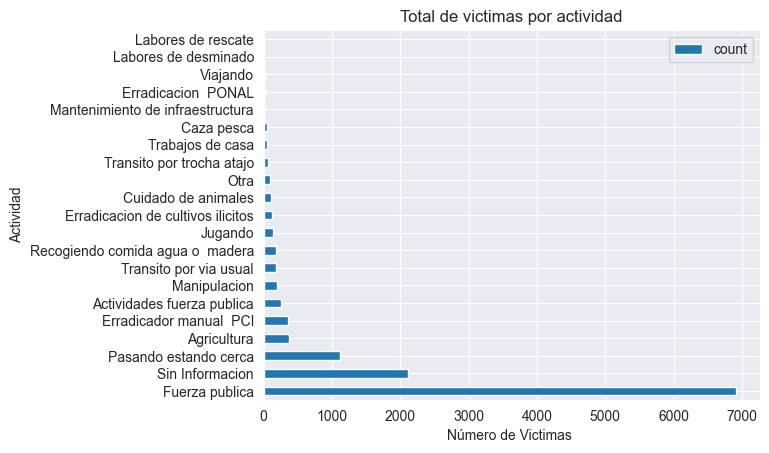

In [259]:
total_victimas_x_actividad.plot(kind='barh')
plt.xlabel('Número de Victimas ')
plt.ylabel('Actividad')
plt.title('Total de victimas por actividad')

### **3.5 - Total de víctimas por género.**

In [196]:
total_victimas_x_genero = pd.DataFrame(registro_map_limpia['genero'])
total_victimas_x_genero = total_victimas_x_genero['genero'].value_counts()
total_victimas_x_genero

genero
Hombre             11651
Mujer                673
Sin Informacion       40
Name: count, dtype: int64

Text(0, 0.5, '')

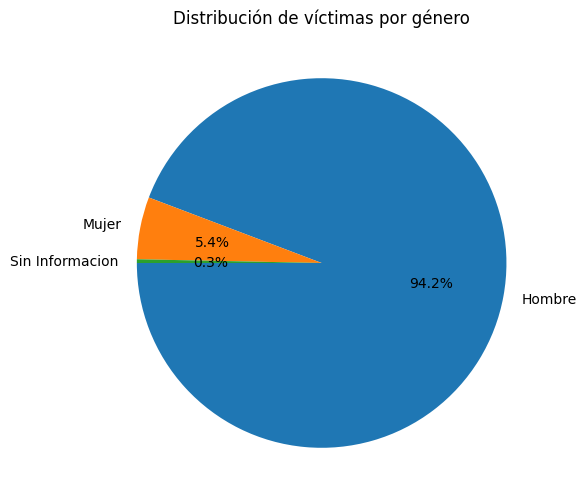

In [244]:
plt.figure(figsize=(8, 6))
total_victimas_x_genero.plot.pie(autopct='%1.1f%%', startangle=180, labels=total_victimas_x_genero.index)
plt.title('Distribución de víctimas por género')
plt.ylabel('')

### **3.6 - total de víctimas por estado.**

In [254]:
total_victimas_x_estado = pd.DataFrame(registro_map_limpia['estado'])
total_victimas_x_estado = pd.DataFrame(registro_map_limpia['estado'].value_counts()).reset_index()
total_victimas_x_estado.columns = ['estado', 'cantidad de victimas']
total_victimas_x_estado

,estado,cantidad de victimas
0,Herido,10013
1,Muerto,2351


Text(0.5, 1.0, 'Estado de las víctimas de minas antipersonas')

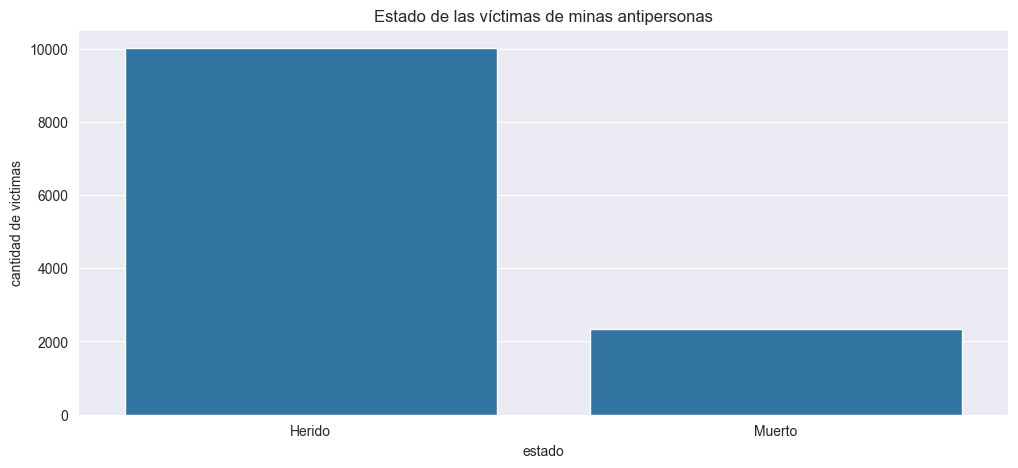

In [285]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,5))
sns.barplot(x='estado', y='cantidad de victimas', data = total_victimas_x_estado)
plt.xticks( rotation=0)
plt.title('Estado de las víctimas de minas antipersonas')